Daniel Yu

# Assignment 1

Dear students, you have successfully cloned the repo. Great! :)

This assignment includes a warm-up task "Image_I/O" and the task "Color spaces and morphological operators" from the first lecture.

## Task 0 - Image-I/O

There are several python libraries for reading and displaying images. I recommend scikit-image. Execute the next cell and install missing libraries like scikit-image. 

In [2]:
# imports
%matplotlib inline
from skimage import io, data, color
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

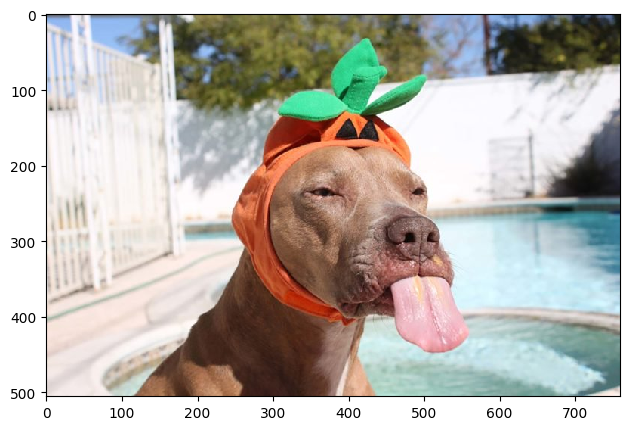

In [3]:
image = io.imread('images/dog.jpg')
io.imshow(image)

By the way, there are many test images in skimage.data that you can use for your tasks. Execute the next two cells. 

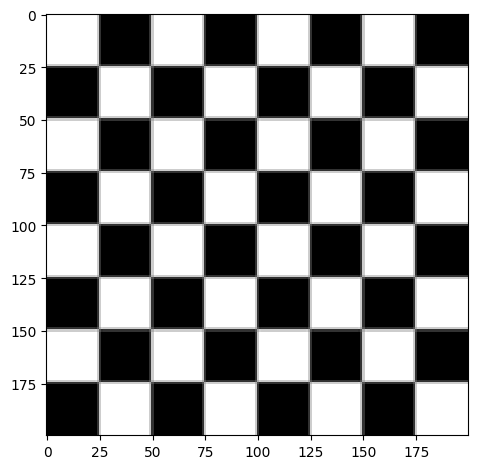

In [24]:
io.imshow(data.checkerboard())

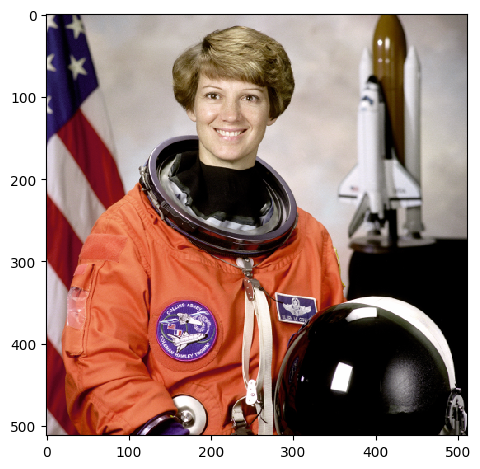

In [25]:
io.imshow(data.astronaut())

Add a line of code to the next cell to display 440 <= x <= 540 and 250 <= y <= 390 for the dog image!

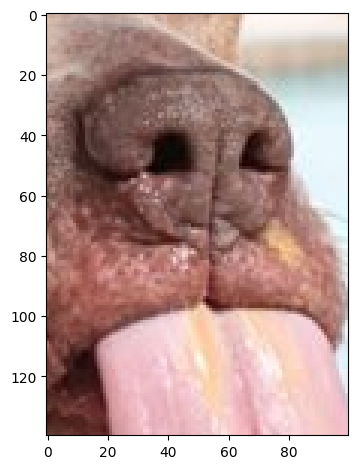

In [26]:
xstart, xend, ystart,yend = 440, 540, 250, 390

slicedImage = image[ystart:yend, xstart:xend]
io.imshow(slicedImage)

Now convert the color image to a grayscale image and display it!

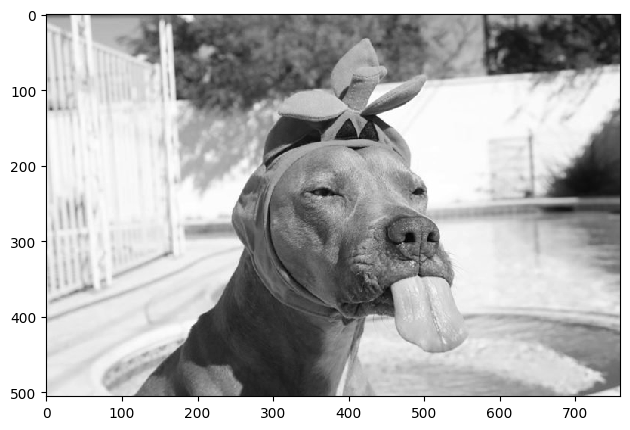

In [27]:
grayImage = color.rgb2gray(image)
io.imshow(grayImage)

There are other color spaces. For example, HSV will be used in the lecture. Convert your image to HSV and display the H-channel.

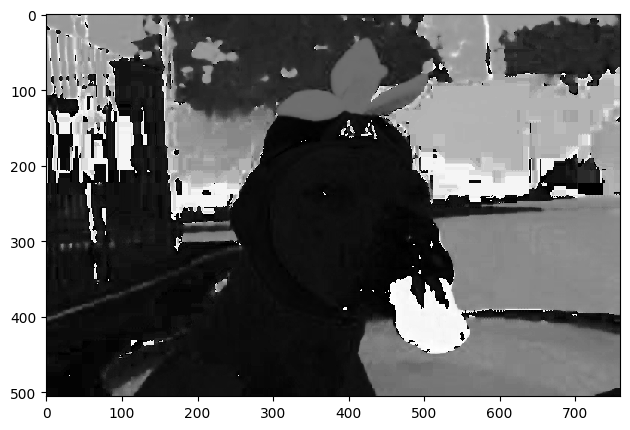

In [28]:
hsvImage = color.rgb2hsv(image)
extractChannel = hsvImage[:, :, 0]

io.imshow(extractChannel)

Did you know that HSV now allows creating robust (i.e. lighting independent) color histograms? Create one with Matplotlib!

In [29]:
# plt.
# TODO docs? Ist doch nur Aufwärmung 

## Task 1 - Color Spaces and Morphological Operators

### Task 1.1

For an image of your choice, implement the simple binarization method as shown in the lecture. We've put an example image in `/images`.

* Define the „positive“ subspace P in the RGB cube
* Iterate over all pixels in I and check if in P or ~P
* Write result to new image
* Play around with size and shape of P and display binary image (**RESULT**)

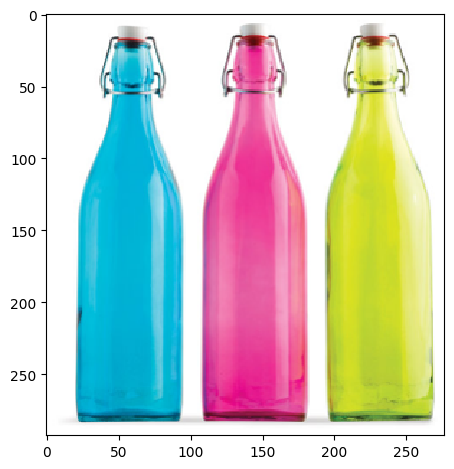

In [5]:
image = io.imread('images/bottles.png')
io.imshow(image)

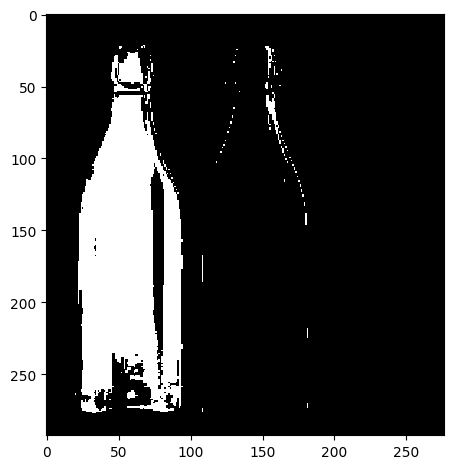

In [6]:
image = io.imread('images/bottles.png')

def colorDetection(image, check):
    newImage = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            r,g,b = image[y, x]
            if check(r,g,b, y, x):
                newImage[y, x] = [255, 255, 255]
                # xylist.append((x, y, r, g, b))
            else:
                newImage[y, x] = [0, 0, 0]
                
    return newImage

b_min, b_max = 205, 255
g_min, g_max = 80, 200
newImage = colorDetection(image, lambda r, g, b, x,y : g > g_min and g < g_max and b > b_min and b < b_max)

io.imshow(newImage)
#print(xylist[:100])

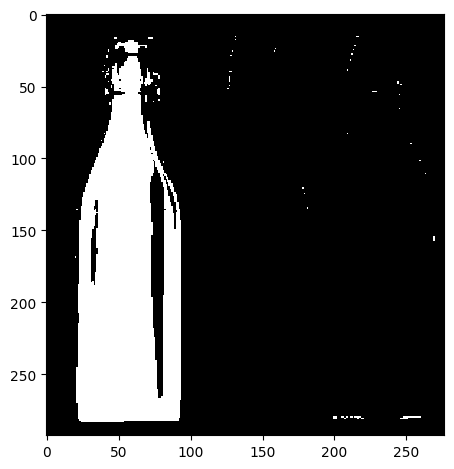

In [7]:
image = io.imread('images/bottles.png')
new2Image = image.copy()

# P by defining ~P as red and white supspace over:
r_min, r_max = 60, 255
xylist = []
#iterate through the pixals
for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        r,g,b = image[y, x]
        
        # my idea kill background and everythin with red
        if r > r_min and r < r_max or r > 250 and g > 250 and b > 250:
            new2Image[y, x] = [0, 0, 0]
            xylist.append((x, y, r, g, b))
        
        else:
            new2Image[y, x] = [255, 255, 255]
io.imshow(new2Image)
#print(xylist[:100])

### Task 1.2

* Take your binary color detection image
* Erase noise with an erosion operation
* Dilate once to get original size of object
* Find connected components with the two-pass algorithm
* Extract the bounding box on the fly
* Draw the bounding box on original image (**RESULT**)

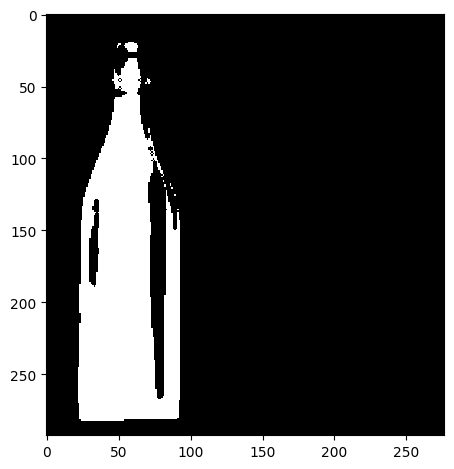

In [8]:
def GetErodeImage(image):
    newImage = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            erodePx(x, y, image, newImage)
    return newImage

def erodePx(x,y, image, newImage):
    # inital white
    newImage[y, x] = [255, 255, 255]
        
    if x > 0: # otherwise border
        if not image[y][x-1].any():
            newImage[y, x] = [0, 0, 0]
            return False
    
    if y > 0: # otherwise border
        if not image[y-1][x].any():
            newImage[y, x] = [0, 0, 0]
            return False
        
    if x < image.shape[1]-1: # otherwise border
        if not image[y][x+1].any():
            newImage[y, x] = [0, 0, 0]
            return False
        
    if y < image.shape[0]-1: # otherwise border
        if not image[y+1][x].any():
            newImage[y, x] = [0, 0, 0]
            return False
    return True
            
erodImage = GetErodeImage(new2Image)
# certainly possible for the points on the border, but I design like 
        
io.imshow(erodImage)

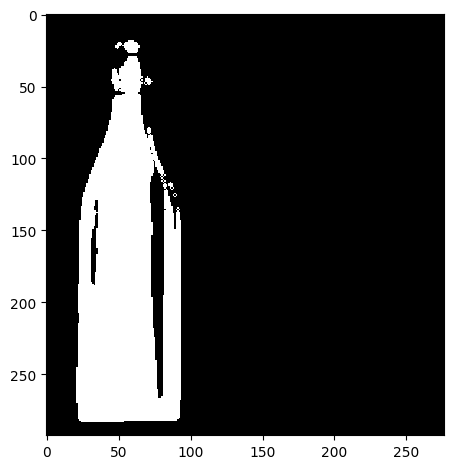

In [9]:
def dilatePx(x,y, image, newImage):
    #initial black
    newImage[y, x] = [0, 0, 0]
        
    if x > 0: # otherwise border
        if image[y][x-1].any():
            newImage[y, x] = [255, 255, 255]
            return True
    
    if y > 0: # otherwise border
        if image[y-1][x].any():
            newImage[y, x] = [255, 255, 255]
            return True
        
    if x < image.shape[1]-1: # otherwise border
        if image[y][x+1].any():
            newImage[y, x] = [255, 255, 255]
            return True
        
    if y < image.shape[0]-1: # otherwise border
        if image[y+1][x].any():
            newImage[y, x] = [255, 255, 255]
            return True
    return False

def GetDilateImage(image):
    newImage = image.copy()
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            dilatePx(x, y, image, newImage)
    return newImage

diaImage = GetDilateImage(erodImage)



io.imshow(diaImage)

In [10]:
from collections import deque

def IsActivePoint(point, image):
    y,x = point
    return image[y][x].any()
    
def GetAllNeighbor(point,image):
    y,x = point
    #print(f"x: {x} y: {y}")
    neighborList = []
    if x > 0: # otherwise border
        neighborList.append((y,x-1))
    
    if y > 0: # otherwise border
        neighborList.append((y-1,x))
        
    if x < image.shape[1]-1: # otherwise border
        neighborList.append((y,x+1))
        
    if y < image.shape[0]-1: # otherwise border
        neighborList.append((y+1,x))
        
    return neighborList

def SetCompForPoint(x: int, y: int, image, map: dict, compNum: int):
    minComp = compNum
    if x > 0: # otherwise border
        if (y,x-1) in map and IsActivePoint((y, x-1), image):
            minComp = map[(y,x-1)]
    
    if y > 0: # otherwise border
        if (y-1,x) in map and IsActivePoint((y-1, x), image):
            minComp = min(map[(y-1,x)], minComp)
        
    if x < image.shape[1]-1: # otherwise border
        if (y,x+1) in map and IsActivePoint((y, x+1), image):
            minComp = min(map[(y,x+1)], minComp)
        
    if y < image.shape[0]-1: # otherwise border
        if (y+1,x) in map and IsActivePoint((y+1, x), image):
            minComp = min(map[(y+1,x)], minComp)

    map[(y,x)] = minComp
    if minComp != compNum:
        return compNum
    
    return compNum+1 #case: we added new component

# greedy dfs with priority
# remark, one could also use tarjan scc algorithm, but it would be really slow 
def onePass(image, pointCompMap = {}):
    compNum = 1
    seen = {(y,x): 0 for y in range(image.shape[0]) for x in range(image.shape[1])}
    cur = (0,0)
    seen[cur]=1
    # instead of prio queue, I use deque because I just need to diff between important and unimportant
    stack = deque(GetAllNeighbor(cur, image))
    for point in stack:
        seen[point] = 1
        
    if IsActivePoint(point, image):
        pointCompMap[(y,x)] = 1
        compNum = 2
        
    # dfs 
    while stack:
        cur = stack.pop()
        
        minCompNum = compNum
        
        IsRelevantPoint = IsActivePoint(cur, image)
        for neighbor in GetAllNeighbor(cur, image):
            
            if seen[neighbor] == 0:
                seen[neighbor] = 1 # we will visit every node once
                if IsRelevantPoint:
                    stack.append(neighbor)
                else:
                    stack.appendleft(neighbor)
                    
                
                
            elif IsRelevantPoint and IsActivePoint(neighbor, image) and neighbor in pointCompMap: # neighbor is active and seen, we want his number
                minCompNum = min(minCompNum, pointCompMap[neighbor])
                
        if IsRelevantPoint:        
            pointCompMap[cur] = minCompNum
            if minCompNum == compNum:
                compNum += 1
            
    return pointCompMap
        
        
# two pass algorithm with 4-neighborhood

def twoPass(image):
    pointCompMap = {} 
    CompNum = 1 # true compNum by one lower
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            CompNum = SetCompForPoint(x, y, image, pointCompMap, CompNum)
    
    # it is not quite obvious how to iterate in one more loop as in the 
    # slide, such that the result is correct 
    # just implement one-pass, first part is a bit useless
    
    # note - landgraf had to make correction,
    # what we need is a union find data structure to quick aggregate sets / scc
    
    # this will not work, because it don't overwrite map correctly garbaggge
    # either adjust Onepass or something like backwalking -> n^2 worstcase
    onePass(diaImage, pointCompMap)
        
    return pointCompMap
      
#pointCompMap = twoPass(diaImage)
pointCompMap = onePass(diaImage)
print(set(pointCompMap.values()))
  



{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}


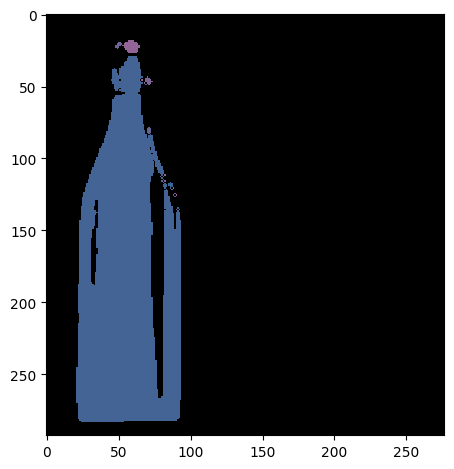

In [12]:
#check table # it seems that the algorithm works correct - there a just a bit unconnected comp
from collections import Counter

pointCompMap = onePass(diaImage)
print(set(pointCompMap.values()))
  
imageCheck = np.zeros_like(diaImage)
for key, value in pointCompMap.items():
    rand = (255-value*79)%117+ 50
    imageCheck[key[0]][key[1]] = [min(rand, 200), 100, max(150,rand)]

    
def BuildImageFromBinaryMap(image, pointCompMap):
    data = Counter(pointCompMap.values())
    biggestCompNum = data.most_common(1)[0][0]
    #filter after biggest Comp
    newImage = np.zeros_like(image)
    for key, value in pointCompMap.items():
        if value == biggestCompNum:
            newImage[key[0]][key[1]] = [255, 255, 255]
            
    return newImage

io.imshow(imageCheck)
# I tried more dilations on that picture, but there are small pieces, that are difficult to merge

21 93 19 283


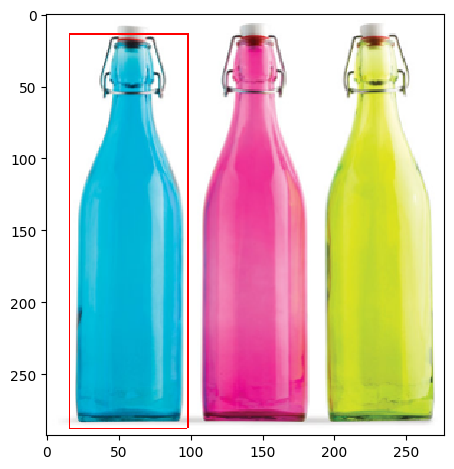

In [13]:
# for bounding box we are just interested in the components with extremst x- or y-coordinates
minx = miny =  300
maxx = maxy = 0
for y,x in pointCompMap.keys():
    minx = min(minx, x)
    maxx = max(maxx, x)
    miny = min(miny, y)
    maxy = max(maxy, y)

print(minx, maxx, miny, maxy)

def GetCornerPoints(image, cond):
    minx = miny = max(image.shape[0], image.shape[1])
    maxx = maxy = 0
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if IsActivePoint((y,x), image) and cond(x,y):
                minx = min(minx, x)
                maxx = max(maxx, x)
                miny = min(miny, y)
                maxy = max(maxy, y)
    return [minx, maxx, miny, maxy]

def SetBoundingBox(pic):
    minx, maxx, miny, maxy = GetCornerPoints(pic, lambda x,y: IsActivePoint((y,x), pic))
    for y in range(miny, maxy):
        pic[y][minx] = pic[y][maxx] = [255, 0, 0]

    for x in range(minx, maxx):
        pic[maxy][x] = pic[miny][x] = [255, 0, 0] #there is a weird bug, that one border is not drawn

def SetBoundingBoxByCorners(pic, cornerPoints):
    minx, maxx, miny, maxy = cornerPoints
    for y in range(172, 337):
        pic[y][43] = [255, 0, 0]
        pic[y][160] = [255, 0, 0]

    for x in range(43, 160):
        print([miny, x])# ganz weird
        pic[337][x] = [255, 0, 0]
        pic[172][x] = [255, 0, 0] #there is a weird bug, that one border is not drawn
        
minx -= 5
miny -= 5
maxx += 5
maxy += 5

for y in range(miny, maxy):
    image[y][minx] = [255, 0, 0]
    image[y][maxx] = [255, 0, 0]

for x in range(minx, maxx):
    image[miny][x] = [255, 0, 0]
    image[maxy][x] = [255, 0, 0]
    
io.imshow(image)
    

### Task 1.3

* Use your color detection and connected components algorithm
* Implement simplest tracking algorithm
* Draw history of all previous points on the frame (**RESULT**)

(see images/racecar or images/taco for sample image sequences)

In [16]:
from scipy.spatial import distance
import networkx as nx

# wie soll ich die benutzen? Die sind korrekt geschrieben

def greedyNeigborChoice(point, candidates):
    if len(candidates) == 0:
        return None
    
    minDist, bestCandidate =  distance.euclidean(point, candidates[0]), candidates[0]
    for candidate in candidates:
        if distance.euclidean(point, candidate) < minDist:
            minDist, bestCandidate = distance.euclidean(point, candidate), candidate
    
    return bestCandidate
        
# assume two arrays of points
def GetTrackingLikeVL(originalPoint, candidates):
    Matching = []

    for point in originalPoint: # it would be better to find the min of matching
        bestCandidate = greedyNeigborChoice(point, candidates)
        candidates.remove(bestCandidate)
        Matching.append((point, bestCandidate))
        
    return Matching

# assume two arrays of points
def GetTrackingBestMatch(originalPoint, candidates):
    
    # it would be better to find the min weight of max matching
    # that can be reduced to max flow in poly time because bipartit graph
    
    # First construct 
    G = nx.Graph()
    G.add_nodes_from(originalPoint, bipartite=0)
    G.add_nodes_from(candidates, bipartite=1)
    
    for point in originalPoint:
        for candidate in candidates:
            G.add_edge(point, candidate, weight=-distance.euclidea(point, candidate))
            
    matching = nx.algorithms.matching.min_weight_matching(G, maxcardinality=True)
    
    # more elegant and optimal by max flow
    return matching


    
        


[43, 160, 172, 337]
[172, 43]
[172, 44]
[172, 45]
[172, 46]
[172, 47]
[172, 48]
[172, 49]
[172, 50]
[172, 51]
[172, 52]
[172, 53]
[172, 54]
[172, 55]
[172, 56]
[172, 57]
[172, 58]
[172, 59]
[172, 60]
[172, 61]
[172, 62]
[172, 63]
[172, 64]
[172, 65]
[172, 66]
[172, 67]
[172, 68]
[172, 69]
[172, 70]
[172, 71]
[172, 72]
[172, 73]
[172, 74]
[172, 75]
[172, 76]
[172, 77]
[172, 78]
[172, 79]
[172, 80]
[172, 81]
[172, 82]
[172, 83]
[172, 84]
[172, 85]
[172, 86]
[172, 87]
[172, 88]
[172, 89]
[172, 90]
[172, 91]
[172, 92]
[172, 93]
[172, 94]
[172, 95]
[172, 96]
[172, 97]
[172, 98]
[172, 99]
[172, 100]
[172, 101]
[172, 102]
[172, 103]
[172, 104]
[172, 105]
[172, 106]
[172, 107]
[172, 108]
[172, 109]
[172, 110]
[172, 111]
[172, 112]
[172, 113]
[172, 114]
[172, 115]
[172, 116]
[172, 117]
[172, 118]
[172, 119]
[172, 120]
[172, 121]
[172, 122]
[172, 123]
[172, 124]
[172, 125]
[172, 126]
[172, 127]
[172, 128]
[172, 129]
[172, 130]
[172, 131]
[172, 132]
[172, 133]
[172, 134]
[172, 135]
[172, 136]
[17

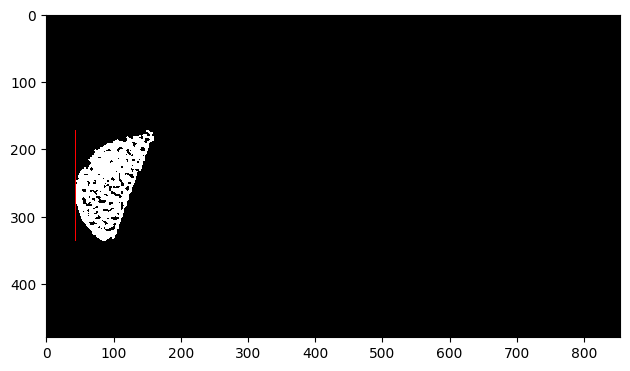

In [17]:
import os
from collections import Counter

# try to viz track
# I interpret all previous points as just the points from predecessor picture

i=0
prevImage = np.zeros_like(image)
for taco in os.listdir('images/taco'):
    
    racecar = io.imread(f'images/taco/030.jpg')
    b_min, b_max = 0, 90
    g_min, g_max = 0, 150
    a_min, a_max = 180, 256 
    
    #find anouther exp for middle
    
    processedCar = GetDilateImage(GetErodeImage(colorDetection(racecar, lambda r, g, b, x, y: g > g_min and g < g_max and b > b_min and b < b_max and r > a_min and r < a_max)))
    filteredImage = BuildImageFromBinaryMap(processedCar, onePass(processedCar, {}))
    cornerPoints = GetCornerPoints(filteredImage, lambda x,y: True) # list of minx, maxx, miny, maxy
    prevCornerPoints = GetCornerPoints(prevImage, lambda x,y: True)
    print(cornerPoints)
    SetBoundingBoxByCorners(filteredImage, cornerPoints)
    #SetBoundingBoxByCorners(filteredImage, prevCornerPoints)
    #print(GetMinMax(filteredImage, lambda x,y: IsActivePoint((y,x), filteredImage)))
    io.imshow(filteredImage)
    prevfilteredImage = filteredImage
    
    i+=1
    if i % 2 == 1:
        break
        

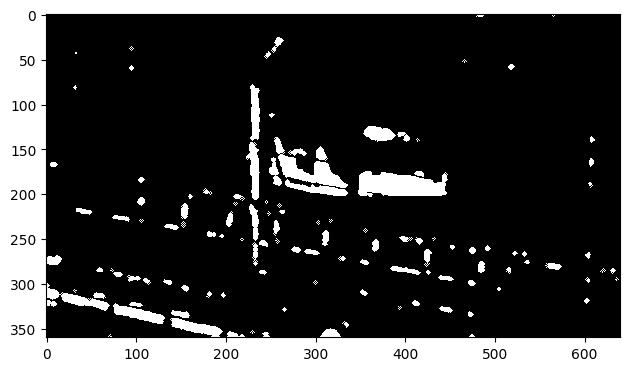

In [25]:
# spielereien mit dem Auto, ist nicht gerade leicht
# unten ähnliche Versuche
import os

for image in os.listdir('images/racecar'):
    racecar = io.imread(f'images/racecar/047.jpeg')
    b_min, b_max = 0, 105
    g_min, g_max = -1, 55 # 80 better, but fence is visible
    a_min, a_max = -1, 70 # unterseite
    
    bo_min, bo_max = 180, 250 # oberseite
    go_min, go_max = 170, 220
    ao_min, ao_max = 175, 225
    
    #find anouther exp for middle
    
    processedCar = GetDilateImage(GetDilateImage(GetErodeImage(GetErodeImage(colorDetection(racecar, lambda r, g, b, x,y : g > g_min and g < g_max and b > b_min and b < b_max and r > a_min and r < a_max or g > go_min and g < go_max and b > bo_min and b < bo_max and r > ao_min and r < ao_max)))))
    io.imshow(processedCar)
    break

### Task 1.4 (BONUS)

* Find connected components using a one-pass algorithm in your image from Task 1.2
* Plot the resulting image and compare it to the result of your two-pass implementation (**RESULT**)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}


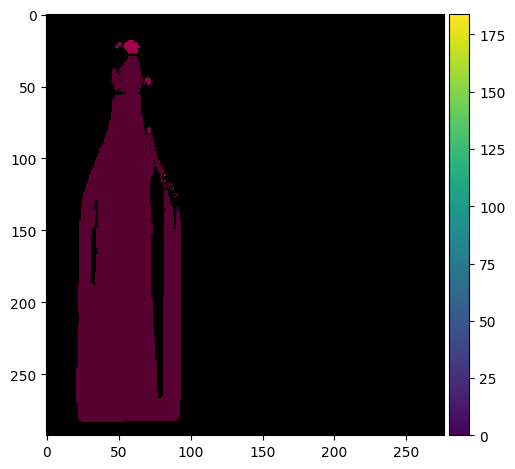

In [137]:
# code here
# In one-pass - use stack remember open pixel with component-possiblity, like using dfs with priorities.
# Approach first visit a everything from a component


# copy pasted von oben
def onePass(image, pointCompMap = {}):
    compNum = 1
    seen = {(y,x): 0 for y in range(image.shape[0]) for x in range(image.shape[1])}
    cur = (0,0)
    seen[cur]=1
    # instead of prio queue, I use deque because I just need to diff between important and unimportant
    stack = deque(GetAllNeighbor(cur, image))
    for point in stack:
        seen[point] = 1
        
    if IsActivePoint(point, image):
        pointCompMap[(y,x)] = 1
        compNum = 2
        
    # dfs 
    while stack:
        cur = stack.pop()
        
        minCompNum = compNum
        
        IsRelevantPoint = IsActivePoint(cur, image)
        for neighbor in GetAllNeighbor(cur, image):
            
            if seen[neighbor] == 0:
                seen[neighbor] = 1 # we will visit every node once
                if IsRelevantPoint:
                    stack.append(neighbor)
                else:
                    stack.appendleft(neighbor)
                       
            elif IsRelevantPoint and IsActivePoint(neighbor, image) and neighbor in pointCompMap: # neighbor is active and seen, we want his number
                minCompNum = min(minCompNum, pointCompMap[neighbor])
                
        if IsRelevantPoint:        
            pointCompMap[cur] = minCompNum
            if minCompNum == compNum:
                compNum += 1
            
    return pointCompMap

pointCompMap3 = onePass(diaImage)
print(set(pointCompMap3.values()))
image = np.zeros_like(diaImage)
for key, value in pointCompMap.items():
    rand = (255-value*79)%117+ 50
    image[key[0]][key[1]] = [min(rand, 200)+20, 0, min(100,rand)-20]
    
io.imshow(image)



## Congratz, you made it! :)